In [1]:
# Import libraries and custom functions defined in Workbook_Init.py
from initial import *

df_raw = pd.read_csv('./parking_history.csv')
df_raw.head(10)

,parking_yard_id,occcupancy,last_update,capacity
0,P1,38,01/01/2021 12:29:24,120
1,P1,119,01/01/2021 12:58:56,120
2,P1,100,01/01/2021 13:29:02,120
3,P1,68,01/01/2021 13:59:00,120
4,P1,95,01/01/2021 14:29:35,120
5,P1,9,01/01/2021 14:59:23,120
6,P1,113,01/01/2021 15:29:00,120
7,P1,110,01/01/2021 15:58:41,120
8,P1,3,01/01/2021 16:29:17,120
9,P1,58,01/01/2021 16:59:13,120


In [2]:
len(df_raw)
df_raw.dtypes

parking_yard_id    object
occcupancy          int64
last_update        object
capacity            int64
dtype: object

In [3]:
df_clean = df_raw.copy()
df_clean.last_update = df_clean.last_update.astype('datetime64')
df_clean['PercentOccupied'] = df_clean.occcupancy / df_clean.capacity
df_clean['date'] = df_clean.last_update.dt.date
df_clean['dayofweek'] = df_clean.last_update.dt.dayofweek
df_clean['date_time_halfhour'] = df_clean.last_update.dt.round('30min')
df_clean['time'] = df_clean.date_time_halfhour.dt.time

df_clean.head(100)

,parking_yard_id,occcupancy,last_update,capacity,PercentOccupied,date,dayofweek,date_time_halfhour,time
0,P1,38,2021-01-01 12:29:24,120,0.316667,2021-01-01,4,2021-01-01 12:30:00,12:30:00
1,P1,119,2021-01-01 12:58:56,120,0.991667,2021-01-01,4,2021-01-01 13:00:00,13:00:00
2,P1,100,2021-01-01 13:29:02,120,0.833333,2021-01-01,4,2021-01-01 13:30:00,13:30:00
3,P1,68,2021-01-01 13:59:00,120,0.566667,2021-01-01,4,2021-01-01 14:00:00,14:00:00
4,P1,95,2021-01-01 14:29:35,120,0.791667,2021-01-01,4,2021-01-01 14:30:00,14:30:00
...,...,...,...,...,...,...,...,...,...
95,P1,18,2021-01-03 11:51:30,120,0.150000,2021-01-03,6,2021-01-03 12:00:00,12:00:00
96,P1,63,2021-01-03 12:22:23,120,0.525000,2021-01-03,6,2021-01-03 12:30:00,12:30:00
97,P1,112,2021-01-03 12:53:20,120,0.933333,2021-01-03,6,2021-01-03 13:00:00,13:00:00
98,P1,103,2021-01-03 13:22:50,120,0.858333,2021-01-03,6,2021-01-03 13:30:00,13:30:00


In [4]:
df_clean.groupby('time').size()

time
00:00:00    1259
00:30:00    1258
01:00:00    1264
01:30:00    1265
02:00:00    1257
02:30:00    1257
03:00:00    1265
03:30:00    1256
04:00:00    1238
04:30:00    1234
05:00:00    1238
05:30:00    1231
06:00:00    1230
06:30:00    1231
07:00:00    1229
07:30:00    1229
08:00:00    1232
08:30:00    1234
09:00:00    1229
09:30:00    1221
10:00:00    1240
10:30:00    1227
11:00:00    1230
11:30:00    1223
12:00:00    1232
12:30:00    1259
13:00:00    1266
13:30:00    1262
14:00:00    1262
14:30:00    1261
15:00:00    1256
15:30:00    1265
16:00:00    1257
16:30:00    1255
17:00:00    1264
17:30:00    1259
18:00:00    1256
18:30:00    1264
19:00:00    1257
19:30:00    1258
20:00:00    1261
20:30:00    1262
21:00:00    1263
21:30:00    1257
22:00:00    1264
22:30:00    1256
23:00:00    1267
23:30:00    1260
dtype: int64

In [5]:
# drop duplicates
pre_len = len(df_clean)
df_clean = df_clean.drop_duplicates()

post_len = len(df_clean)

dropped_len = pre_len - post_len
print(dropped_len)

0


In [6]:
#values out of range of 0-100%
print('Minimum Percent Occupied: {:.2%}'.format(df_clean.PercentOccupied.min()))
print('Maximum Percent Occupied: {:.2%}'.format(df_clean.PercentOccupied.max()))

Minimum Percent Occupied: 0.00%
Maximum Percent Occupied: 100.00%


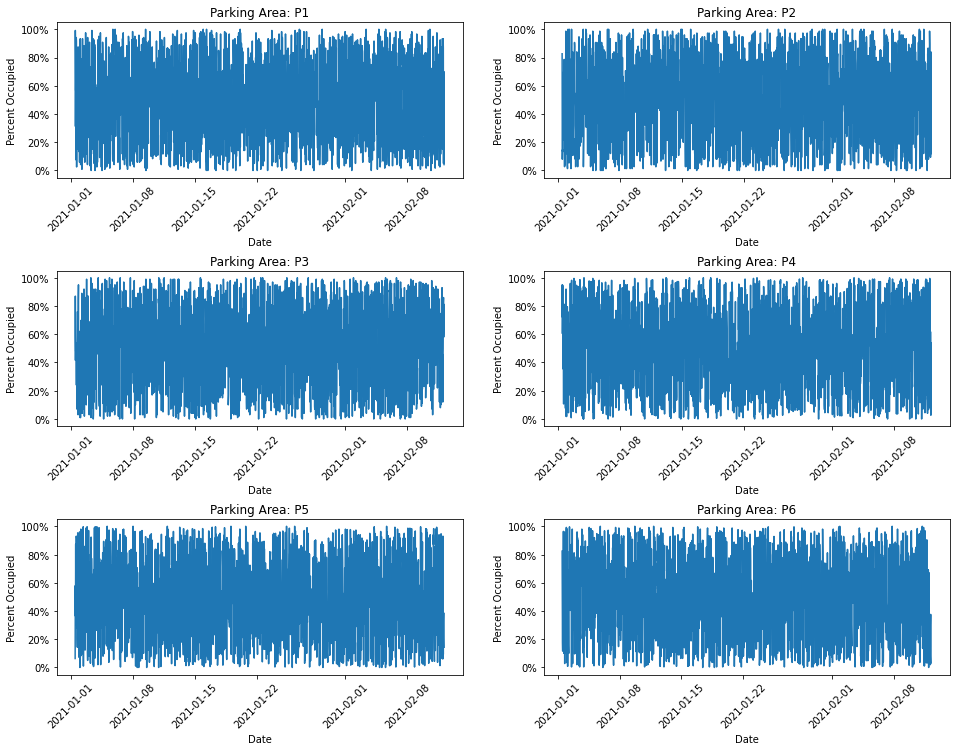

In [7]:
sample_plots_by_scn(df=df_clean, num_graphs=6, num_per_row=2)

In [8]:
df_agg_dthh = df_clean.groupby('date_time_halfhour').agg({'occcupancy':['sum','count'], 'capacity':['sum','count']})
df_agg_dthh['PercentOccupied'] = df_agg_dthh.occcupancy['sum'] / df_agg_dthh.capacity['sum']

In [10]:
df_agg_dthh[(df_agg_dthh.occcupancy['count']<20)|(df_agg_dthh.capacity['sum']<1000)]

occcupancy       capacity       PercentOccupied
                           sum count      sum count                
date_time_halfhour                                                 
2021-02-12 04:00:00       2483    13     4630    13        0.536285
2021-02-12 04:30:00        502     5     1608     5        0.312189
2021-02-12 05:00:00         29     1      228     1        0.127193